### Feature Selection for Regression Problem using ANOVA(Analysis of Variance) or F-Test 

- A univariate test,Linear model for testing the individual effect of each of features with target.
- ANOVA assumes a linear relationship between the features and the target, and also that the variables are normally distributed.
- It’s well-suited for continuous variables and requires a binary target, but sklearn extends it to regression problems, also.

<span style="color:blue"> Youtube Video Explanation : https://youtu.be/wElwOM88xJQ

### Feature Selection for Classification Problem using ANOVA(Analysis of Variance) or F-Test

https://datascience.stackexchange.com/questions/74465/how-to-understand-anova-f-for-feature-selection-in-python-sklearn-selectkbest-w

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math

In [2]:
#Load the dataset #https://www.kaggle.com/burak3ergun/loan-data-set
df_ob = pd.read_csv("D:/New Paper Try/ML/Obesity/New dataset.csv")

In [3]:
df_ob

,Gender,Age,BMI,FHD,DQS,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,target
0,1,24.443011,28.259565,2,1.696659,0,2.763573,0,0.000000,0.976473,1,1,2
1,0,18.000000,23.422091,3,1.700000,0,2.000000,0,1.000000,1.000000,0,4,0
2,0,18.000000,17.126706,2,1.346497,0,1.910378,0,0.866045,1.673584,0,1,1
3,0,20.952737,44.855798,2,2.000000,0,1.674061,0,1.467863,0.780199,1,1,3
4,1,31.641081,25.599151,2,1.698194,0,1.979848,0,1.967973,0.931721,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,25.137087,36.587084,2,1.975875,0,2.151809,0,1.330519,0.196680,1,1,3
20754,1,18.000000,17.099278,2,2.200000,0,1.000000,0,2.000000,1.000000,1,1,1
20755,1,20.101026,31.889841,2,1.822345,0,2.000000,0,1.158040,1.198439,0,1,3
20756,1,33.852953,28.899693,2,1.695666,0,2.144838,0,0.000000,0.973834,0,4,2


In [4]:
df_ob.isnull().sum()

Gender    0
Age       0
BMI       0
FHD       0
DQS       0
SMOKE     0
CH2O      0
SCC       0
FAF       0
TUE       0
CALC      0
MTRANS    0
target    0
dtype: int64

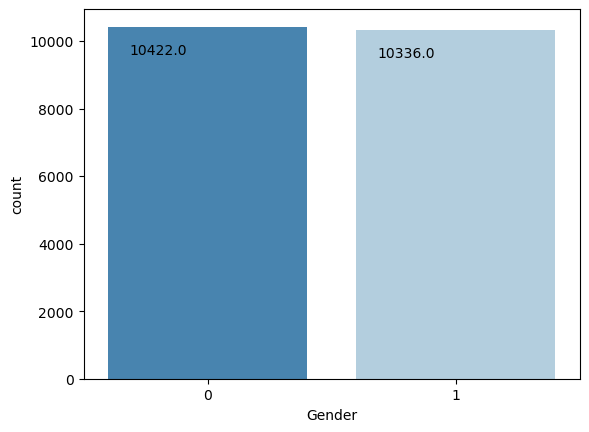

In [3]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.
    
    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "black", size = 10)
    
   # plt.title(f"Number of items in each {cat_variable} category")
    plt.show()
count_values(df_ob, "Gender")

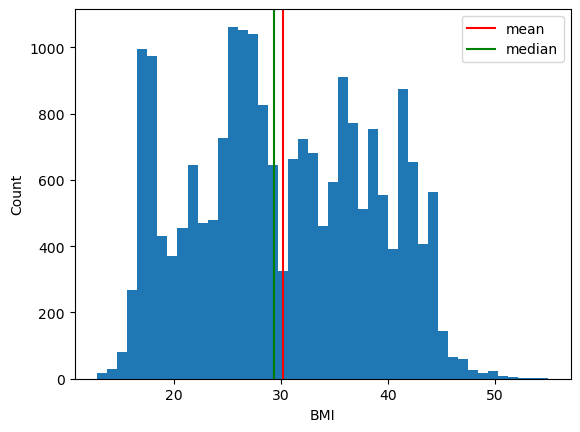

In [4]:
df_ob["Age"].median()
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.
    
    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "green", label = "median")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    #plt.title(f"Distribution of values in {feature}")
    plt.show()
plot_distribution(df_ob, "BMI")

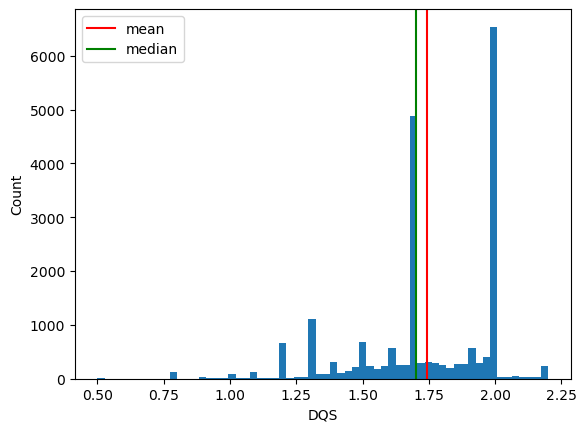

In [5]:
plot_distribution(df_ob, "DQS")

In [6]:
X = df_ob.iloc[:,0:-1]
X.head(5)

,Gender,Age,BMI,FHD,DQS,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,24.443011,28.259565,2,1.696659,0,2.763573,0,0.000000,0.976473,1,1
1,0,18.000000,23.422091,3,1.700000,0,2.000000,0,1.000000,1.000000,0,4
2,0,18.000000,17.126706,2,1.346497,0,1.910378,0,0.866045,1.673584,0,1
3,0,20.952737,44.855798,2,2.000000,0,1.674061,0,1.467863,0.780199,1,1
4,1,31.641081,25.599151,2,1.698194,0,1.979848,0,1.967973,0.931721,1,1


In [7]:
y = df_ob["target"]

In [7]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,2.763573,0,0.000000,0.976473,1,1
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,4
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,1.910378,0,0.866045,1.673584,0,1
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,1.674061,0,1.467863,0.780199,1,1
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,1.979848,0,1.967973,0.931721,1,1


In [11]:
# Define feature selection
from sklearn.feature_selection import f_classif,SelectKBest 
fs = SelectKBest(score_func=f_classif,k=12)

In [12]:
# Apply feature selection
fs.fit(X,y)

SelectKBest(k=12)

In [13]:
# True = Top 5 columns as we mentioned k =5
# False = Allthe remaining columns excpet k =5
fs.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [14]:
fs.get_support().sum()

12

In [15]:
def list_ceil(x):
    return[math.ceil(i) for i in x]

In [16]:
print("P_Values :")
print(np.round(fs.pvalues_,6))
print("F Values :")
print(fs.scores_)

P_Values :
[0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 1.3e-05 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00]
F Values :
[1.99502003e+02 1.37162034e+03 3.09514167e+04 6.11272657e+01
 7.86422354e+02 8.45601083e+00 5.27018029e+02 2.37076733e+02
 3.10653963e+02 1.12725619e+02 1.52108965e+02 1.40072851e+02]


In [17]:
list_ceil(fs.scores_)

[200, 1372, 30952, 62, 787, 9, 528, 238, 311, 113, 153, 141]

In [18]:
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","Score","P_Value"]
print(feature_score.nlargest(15,columns="Score"))

   Input_Features         Score  P_Value
2             BMI  30951.416711      0.0
1             Age   1371.620344      0.0
4             DQS    786.422354      0.0
6            CH2O    527.018029      0.0
8             FAF    310.653963      0.0
7             SCC    237.076733      0.0
0          Gender    199.502003      0.0
10           CALC    152.108965      0.0
11         MTRANS    140.072851      0.0
9             TUE    112.725619      0.0
3             FHD     61.127266      0.0
5           SMOKE      8.456011      0.0


In [ ]:
# RANDOM FOREST

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
#data = pd.read_csv('your_dataset.csv')


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
#Step 2: Train a Random Forest Model to Get Feature Importances

from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = df_ob.drop('target', axis=1).columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)

   feature  importance
2      BMI    0.616158
1      Age    0.113128
4      DQS    0.064009
6     CH2O    0.051449
8      FAF    0.039248
9      TUE    0.037121
3      FHD    0.031147
10    CALC    0.017009
0   Gender    0.012605
11  MTRANS    0.012464
7      SCC    0.004573
5    SMOKE    0.001089


In [21]:
#Step 3: Select Top Features Based on Importance Scores
# Select top N features (e.g., top 10)

top_n_features = feature_importance_df['feature'].head(15).values
print(f'Selected top features: {top_n_features}')


Selected top features: ['BMI' 'Age' 'DQS' 'CH2O' 'FAF' 'TUE' 'FHD' 'CALC' 'Gender' 'MTRANS' 'SCC'
 'SMOKE']


In [22]:
import seaborn as sns
plt.figure(figsize=(4,2))
sns.boxplot(x=df_ob['Weight'])
plt.figure(figsize=(4,2))
sns.boxplot(x=df_ob['Height'])
plt.figure(figsize=(4,2))
sns.boxplot(x=df_ob['Age'])
plt.figure(figsize=(4,2))
sns.boxplot(x=df_ob['CH2O'])
plt.figure(figsize=(4,2))
sns.boxplot(x=df_ob['FAF'])
plt.figure(figsize=(4,2))
sns.boxplot(x=df_ob['CAEC'])
plt.figure(figsize=(4,2))
sns.boxplot(x=df_ob['FCVC'])
plt.figure(figsize=(4,2))
sns.boxplot(x=df_ob['family_history_with_overweight'])

KeyError: 'Weight'

<Figure size 400x200 with 0 Axes>

In [ ]:
pip install imblearn --user

In [ ]:
pip install --upgrade pip

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
pip install scikit-learn==1.2.2 --user

In [23]:
# apply 1. Tree-Based Models when data is with outliers - Randomforest, Gradient Boosting Machines (GBM), XGBoost, 
#Support Vector Machines (SVM), Robust Regression Models for Classification (Logistic Regression with Robust Scaler),
# Ensemble Methods (Bagging and Boosting)
print(df_ob['target'].value_counts())

from imblearn.over_sampling import SMOTE
#smote = SMOTE(sampling_strategy='minority')
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

3    10204
2     4949
0     3082
1     2523
Name: target, dtype: int64


2    10204
0    10204
1    10204
3    10204
Name: target, dtype: int64

In [24]:
#specific_features = ['Weight', 'Height', 'Age','CH2O','FAF','CAEC','FCVC','family_history_with_overweight']  # list of specific features
#X_selected = X_sm[specific_features]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=15, stratify=y_sm)

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset (replace 'your_dataset.csv' with the actual path to your dataset)
#df_heart = pd.read_csv('your_dataset.csv')

# Assuming 'target' is the column indicating heart disease presence (1) or absence (0)
#X = df_heart.drop(columns=['target'])  # Features
#y = df_heart['target']  # Target variable

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Robust Scaler
scaler = RobustScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8975091874234381
Confusion Matrix:
 [[2517  291  251    3]
 [ 155 2891   14    1]
 [ 195   11 2692  163]
 [   0    2  169 2890]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      3062
           1       0.90      0.94      0.92      3061
           2       0.86      0.88      0.87      3061
           3       0.95      0.94      0.94      3061

    accuracy                           0.90     12245
   macro avg       0.90      0.90      0.90     12245
weighted avg       0.90      0.90      0.90     12245



C:\Users\DIT\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
#XGBoost

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)


#model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
#model.fit(X_train, y_train)

# Make predictions
#y_pred = model.predict(X_test)
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4, alpha=0.1, reg_lambda=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.941853817884851
Confusion Matrix:
 [[2840  105  114    3]
 [ 101 2945   14    1]
 [ 134   13 2810  104]
 [   1    2  120 2938]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      3062
           1       0.96      0.96      0.96      3061
           2       0.92      0.92      0.92      3061
           3       0.96      0.96      0.96      3061

    accuracy                           0.94     12245
   macro avg       0.94      0.94      0.94     12245
weighted avg       0.94      0.94      0.94     12245



In [27]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8520212331563903
Confusion Matrix:
 [[2324  466  254   18]
 [  99 2948   11    3]
 [ 410   16 2304  331]
 [   1    2  201 2857]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      3062
           1       0.86      0.96      0.91      3061
           2       0.83      0.75      0.79      3061
           3       0.89      0.93      0.91      3061

    accuracy                           0.85     12245
   macro avg       0.85      0.85      0.85     12245
weighted avg       0.85      0.85      0.85     12245



In [58]:
# Define the ANN model
import numpy as np
import pandas as pd
import tensorflow as tf
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

#model_ann = tf.keras.Sequential([
#    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#    tf.keras.layers.Dense(8, activation='relu'),
#    tf.keras.layers.Dense(4, activation='softmax')
#])
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Layer 0
    tf.keras.layers.Dense(64, activation='relu'),  # Layer 1
    tf.keras.layers.Dense(32, activation='relu'),  # Layer 2
    tf.keras.layers.Dense(4, activation='softmax')  # Layer 3 (Output layer)
])

In [59]:
# Compile the model
model_ann.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [60]:
# Train the model
model_ann.fit(X_train_scaled, y_train, epochs=100, batch_size=25, verbose=0)

In [61]:
# Extract features from the last hidden layer
last_hidden_layer_model = tf.keras.Model(inputs=model_ann.input,
                                         outputs=model_ann.layers[-3].output)
X_train_features = last_hidden_layer_model.predict(X_train_scaled)


893/893 [==============================] - 1s 890us/step


In [62]:
# Train XGBoost model using the features from the last hidden layer
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_features, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [63]:
# Evaluate the XGBoost model
X_test_features = last_hidden_layer_model.predict(X_test_scaled)
y_pred = xgb_model.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

383/383 [==============================] - 0s 899us/step
Accuracy: 0.9198040016333198
Confusion Matrix:
 [[2757  151  149    5]
 [ 142 2905   13    1]
 [ 187   13 2708  153]
 [   2    2  164 2893]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      3062
           1       0.95      0.95      0.95      3061
           2       0.89      0.88      0.89      3061
           3       0.95      0.95      0.95      3061

    accuracy                           0.92     12245
   macro avg       0.92      0.92      0.92     12245
weighted avg       0.92      0.92      0.92     12245



In [ ]:
# Manta Ray

In [64]:
# Manta Ray Optimization Algorithm (MROA)
class MantaRayOptimization:
    def __init__(self, obj_func, bounds, n_iterations=50, n_population=20):
        """
        Initialize the Manta Ray Optimization Algorithm.
        
        :param obj_func: Objective function to minimize.
        :param bounds: List of tuples specifying the bounds for each dimension.
        :param n_iterations: Number of iterations.
        :param n_population: Number of mantas in the population.
        """
        self.obj_func = obj_func
        self.bounds = np.array(bounds)
        self.n_iterations = n_iterations
        self.n_population = n_population
        self.dimensions = len(bounds)
        self.population = np.random.uniform(self.bounds[:, 0], self.bounds[:, 1], 
                                            (self.n_population, self.dimensions))
        self.best_solution = None
        self.best_score = float('inf')

    def _update_positions(self, manta, best_position):
        """
        Update manta positions based on the MROA behavior.
        :param manta: Current manta's position.
        :param best_position: Current best position in the population.
        """
        r1, r2 = np.random.uniform(0, 1, 2)
        walk_factor = np.random.choice([-1, 1]) * np.exp(-r1 * self.n_iterations)
        move_factor = r2 * (best_position - manta)
        return manta + walk_factor + move_factor

    def run(self):
        """
        Execute the MROA optimization process.
        """
        for iteration in range(self.n_iterations):
            scores = [self.obj_func(manta) for manta in self.population]
            for i, score in enumerate(scores):
                if score < self.best_score:
                    self.best_score = score
                    self.best_solution = self.population[i]
            # Update population
            new_population = []
            for manta in self.population:
                new_position = self._update_positions(manta, self.best_solution)
                new_position = np.clip(new_position, self.bounds[:, 0], self.bounds[:, 1])  # Ensure within bounds
                new_population.append(new_position)
            self.population = np.array(new_population)
        return self.best_solution, self.best_score

In [66]:
def evaluate_ann(hyperparameters):
    neurons_layer1, neurons_layer2, learning_rate = hyperparameters
    
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Layer 0
    tf.keras.layers.Dense(64, activation='relu'),  # Layer 1
    tf.keras.layers.Dense(32, activation='relu'),  # Layer 2
    tf.keras.layers.Dense(4, activation='softmax')  # Layer 3 (Output layer)
])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(X_train_scaled, y_train, epochs=30, batch_size=25, verbose=0)  # Reduced epochs for faster optimization
    _, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    return 1 - accuracy  # MROA minimizes the objective, so we return 1 - accuracy


In [67]:
# Define the hyperparameter bounds
hyperparameter_bounds = [
    (8, 128),  # Number of neurons in the first layer
    (4, 64),   # Number of neurons in the second layer
    (0.0001, 0.1)  # Learning rate
]

In [68]:
# Optimize the hyperparameters using MROA
def optimize_ann():
    def objective_function(params):
        # MROA passes parameters as a list; unpack them
        return evaluate_ann(params)
    
    optimizer = MantaRayOptimization(
        obj_func=objective_function,
        bounds=hyperparameter_bounds,
        n_iterations=20,
        n_population=10
    )
    
    best_solution, best_score = optimizer.run()
    return best_solution

In [69]:
# Run the optimization
optimal_hyperparameters = optimize_ann()
neurons_layer1, neurons_layer2, learning_rate = optimal_hyperparameters

In [70]:
# Train the final ANN with optimized hyperparameters
model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(int(neurons_layer1), activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(int(neurons_layer2), activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model_ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_ann.fit(X_train_scaled, y_train, epochs=100, batch_size=25, verbose=0)

In [74]:
# Extract features from the last hidden layer
last_hidden_layer_model = tf.keras.Model(inputs=model_ann.input,
                                         outputs=model_ann.layers[-3].output)
X_train_features = last_hidden_layer_model.predict(X_train_scaled)


893/893 [==============================] - 1s 900us/step


In [75]:
# Train XGBoost model using the features from the last hidden layer
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_features, y_train)

# Evaluate the XGBoost model
X_test_features = last_hidden_layer_model.predict(X_test_scaled)
y_pred = xgb_model.predict(X_test_features)


383/383 [==============================] - 0s 891us/step


In [76]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Optimized Hyperparameters:")
print(f"Layer 1 Neurons: {neurons_layer1}, Layer 2 Neurons: {neurons_layer2}, Learning Rate: {learning_rate}")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Optimized Hyperparameters:
Layer 1 Neurons: 68.5473319341964, Layer 2 Neurons: 51.83462420100594, Learning Rate: 0.0014009411465381242
Accuracy: 0.9398938342180482
Confusion Matrix:
 [[2832  105  122    3]
 [  81 2967   12    1]
 [ 143   12 2792  114]
 [   0    2  141 2918]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      3062
           1       0.96      0.97      0.97      3061
           2       0.91      0.91      0.91      3061
           3       0.96      0.95      0.96      3061

    accuracy                           0.94     12245
   macro avg       0.94      0.94      0.94     12245
weighted avg       0.94      0.94      0.94     12245

